In [ ]:

!pip install keras
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense
import matplotlib.pyplot as plt

data1 = pd.read_csv('updated_data (1).csv')
#polarity_data = pd.read_csv('/content/upload_DJIA_table.csv')
target_column = 'Close'
data = data1[[target_column]]

polarity='Polarity'
f1=data1[[polarity]]
subjectivity='Subjectivity'
f2=data1[[subjectivity]]

f3=data.rolling(5).mean()

data1['mean_close']=f3


df=data1[4:len(data1)]
#print(df)
output_file = 'new_dataset.csv'

# Use the to_csv method to save the DataFrame to a CSV file
df.to_csv(output_file, index=False)
# calculating 'data_to_use'
percentage_of_data = 1.0

total_data= int(percentage_of_data*(len(df)))

# using .9 of data for training and .1 for testing
train_end = int(total_data*0.9)
start = total_data - train_end

# printing number of records in the training and test datasets
print("Data records number:", total_data)
print("Training Data records number:", train_end)
print("Test Data Records number:", start)

# rearanging all columns of 'stock_data'
#stock_data = data1.filter(['Date','Close','Subjectivity','Polarity'])
stock_data = df.filter(['Date','mean_close','Subjectivity','Polarity'])
print(stock_data)
stock_data=stock_data.dropna()

'''# # displaying the data
print(len(stock_data))
stock_data.to_csv('updated.csv')
'''


Data records number: 1985
Training Data records number: 1786
Test Data Records number: 199
            Date    mean_close  Subjectivity  Polarity
4     2008-08-14  11661.605859      0.375099  0.040677
5     2008-08-15  11646.721875      0.457692  0.047756
6     2008-08-18  11586.129883      0.485995  0.016759
7     2008-08-19  11527.345899      0.345230 -0.025814
8     2008-08-20  11504.239844      0.218470  0.038384
...          ...           ...           ...       ...
1984  2016-06-27  17632.524219      0.352311 -0.014015
1985  2016-06-28  17548.522265      0.352649  0.046560
1986  2016-06-29  17531.292187      0.389617  0.052622
1987  2016-06-30  17515.076172      0.382566  0.011243
1988  2016-07-01  17624.800000      0.320261 -0.035458

[1985 rows x 4 columns]


"# # displaying the data\nprint(len(stock_data))\nstock_data.to_csv('updated.csv')\n"

In [ ]:
y = df['Close']
y

# defining the features dataset for prediction
cols = ['mean_close', 'Polarity', 'Subjectivity']
X = stock_data[cols]
X
# preparing training and test dataset
X_train = X[: train_end]
X_test = X[train_end+1 : len(X)]
y_train = y[: train_end]
y_test = y[train_end+1: len(y)]

In [ ]:
# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1786, 3) and y: (1786,)
Number of rows and columns in the Test set X: (198, 3) and y: (198,)


In [ ]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

# scaling the training features dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_train = np.array(X_train).reshape((len(X_train) ,len(cols)))
X_train = scaler_x.fit_transform(X_train)
print(len(X_train))

# scaling the training target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_train = np.array(y_train).reshape ((len( y_train), 1))
y_train = scaler_y.fit_transform (y_train)
print(len(y_train))

# scaling the test features dataset
X_test = np.array(X_test).reshape((len(X_test) ,len(cols)))
X_test= scaler_x.transform(X_test)
print(len(X_test))

# scaling the test target variable
y_test = np.array(y_test).reshape ((len(y_test), 1))
y_test = scaler_y.transform (y_test)
print(len(y_test))


# displaying the scaled  features dataset and the target variable
# X_train, X_test, y_train, y_test

1786
1786
198
198


In [ ]:
# reshaping the feature training dataset for feeding into the model
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1786, 3, 1)
Shape of Test set X: (198, 3, 1)


In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
#np.random.seed(2016)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dropout



# LSTM setting the model architecture
lstm_model=Sequential()
lstm_model.add(LSTM(64,activation="relu",input_shape=(len(cols),1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)
# printing the LSTM model summary
lstm_model.summary()



# GRU setting the model architecture
gru_model=Sequential()
gru_model.add(GRU(64,activation="relu",input_shape=(len(cols),1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=100, batch_size=32)
# printing the GRU model summary
gru_model.summary()

# RNN setting the model architecture
rnn_model=Sequential()
rnn_model.add(SimpleRNN(64,activation="relu",input_shape=(len(cols),1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=100, batch_size=32)
# printing the RNN model summary
rnn_model.summary()

Epoch 1/100
56/56 [==============================] - 2s 5ms/step - loss: 0.2072
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0307
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 7/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 8/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 10/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 12/100
56/56 [==============================] - 0s 3ms/step - loss: 9.9053e-04
Epoch 13/100
56/56 [=============

In [ ]:
# predictions on test data
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)

# unscaling the predictions
lstm_predictions = scaler_y.inverse_transform(np.array(lstm_predictions).reshape((len(lstm_predictions), 1)))
gru_predictions = scaler_y.inverse_transform(np.array(gru_predictions).reshape((len(gru_predictions), 1)))
rnn_predictions = scaler_y.inverse_transform(np.array(rnn_predictions).reshape((len(rnn_predictions), 1)))

# displaying the predicted values
print('Predictions:')
print(lstm_predictions[-10:-1])
print(gru_predictions[-10:-1])
print(rnn_predictions[-10:-1])

7/7 [==============================] - 0s 3ms/step
Predictions:
[[17600.871]
 [17617.705]
 [17671.48 ]
 [17708.602]
 [17668.76 ]
 [17558.182]
 [17450.582]
 [17440.295]
 [17421.299]]
[[17682.371]
 [17710.512]
 [17780.943]
 [17802.396]
 [17751.17 ]
 [17631.146]
 [17528.045]
 [17513.842]
 [17496.613]]
[[17603.05 ]
 [17650.291]
 [17740.1  ]
 [17701.383]
 [17663.455]
 [17574.271]
 [17453.135]
 [17442.002]
 [17431.145]]


In [ ]:
# calculating the training mean-squared-error
lstm_train_loss = lstm_model.evaluate(X_train, y_train, batch_size = 1)
gru_train_loss = gru_model.evaluate(X_train, y_train, batch_size = 1)
rnn_train_loss = rnn_model.evaluate(X_train, y_train, batch_size = 1)

# printing the training mean-squared-errors
print('LSTM Train Loss =',lstm_train_loss)
print('GRU Train Loss =',gru_train_loss)
print('RNN Train Loss =',rnn_train_loss)

 #round(train_loss,4)

1786/1786 [==============================] - 4s 2ms/step - loss: 6.0143e-04
LSTM Train Loss = 0.000717732182238251
GRU Train Loss = 0.0007186572765931487
RNN Train Loss = 0.0006014307145960629


In [ ]:
# calculating the test mean-squared-error
lstm_test_loss = lstm_model.evaluate(X_test, y_test, batch_size = 1)
gru_test_loss = gru_model.evaluate(X_test, y_test, batch_size = 1)
rnn_test_loss = rnn_model.evaluate(X_test, y_test, batch_size = 1)

# printing the test the mean-squared-errors
# print('Test Loss =', round(test_loss,4))
print('lstm_test_loss =',lstm_test_loss)
print('gru_test_loss =',gru_test_loss)
print('rnn_test_loss =',rnn_test_loss)

198/198 [==============================] - 0s 2ms/step - loss: 0.0010
lstm_test_loss = 0.0011032631155103445
gru_test_loss = 0.0008468251908197999
rnn_test_loss = 0.0010203017154708505


In [ ]:
lstm_root_mean_square_error = np.sqrt(np.mean(np.power((y_test - lstm_predictions),2)))
gru_root_mean_square_error = np.sqrt(np.mean(np.power((y_test - gru_predictions),2)))
rnn_root_mean_square_error = np.sqrt(np.mean(np.power((y_test - rnn_predictions),2)))

print('LSTM Root Mean Square Error =', round(lstm_root_mean_square_error,4))
print('GRU Root Mean Square Error =', round(gru_root_mean_square_error,4))
print('RNN Root Mean Square Error =', round(rnn_root_mean_square_error,4))

LSTM Root Mean Square Error = 17185.0787
GRU Root Mean Square Error = 17263.3836
RNN Root Mean Square Error = 17207.7955


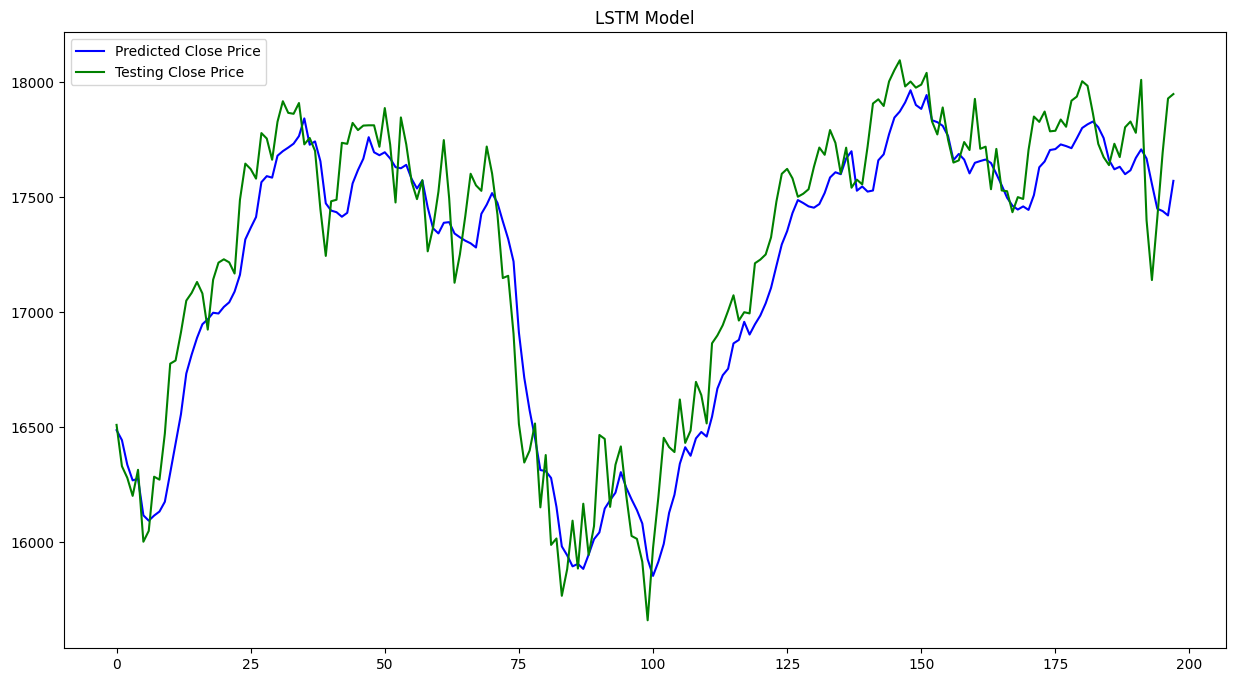

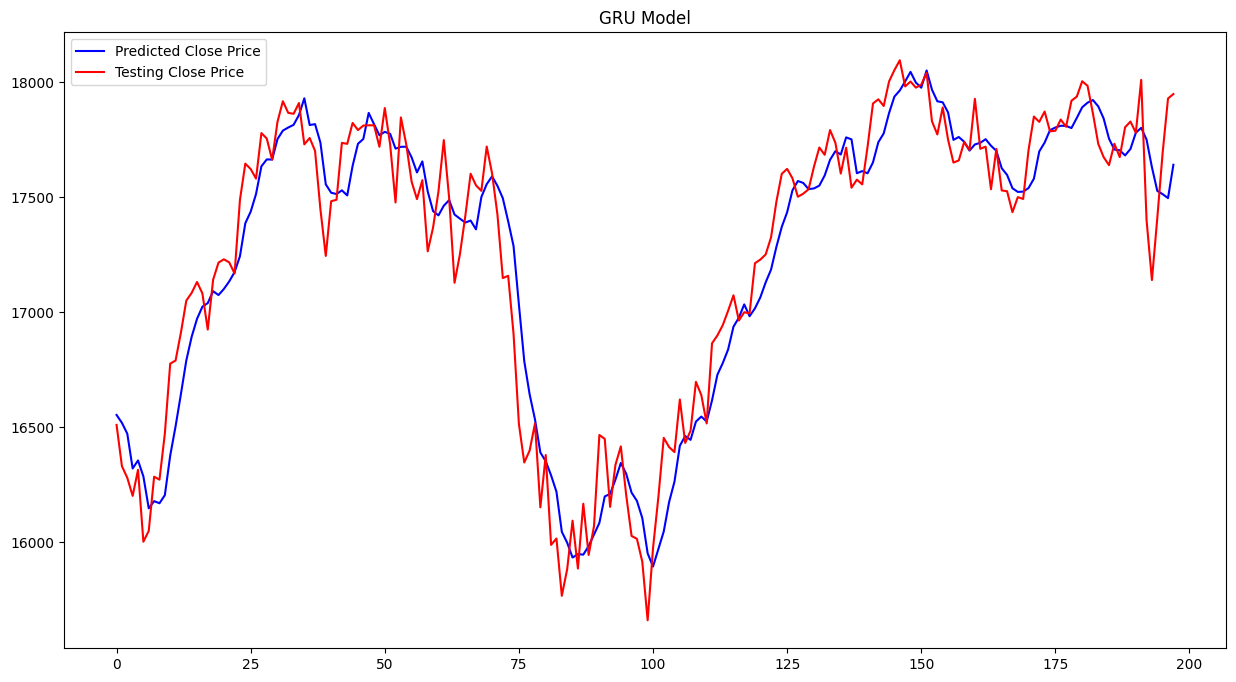

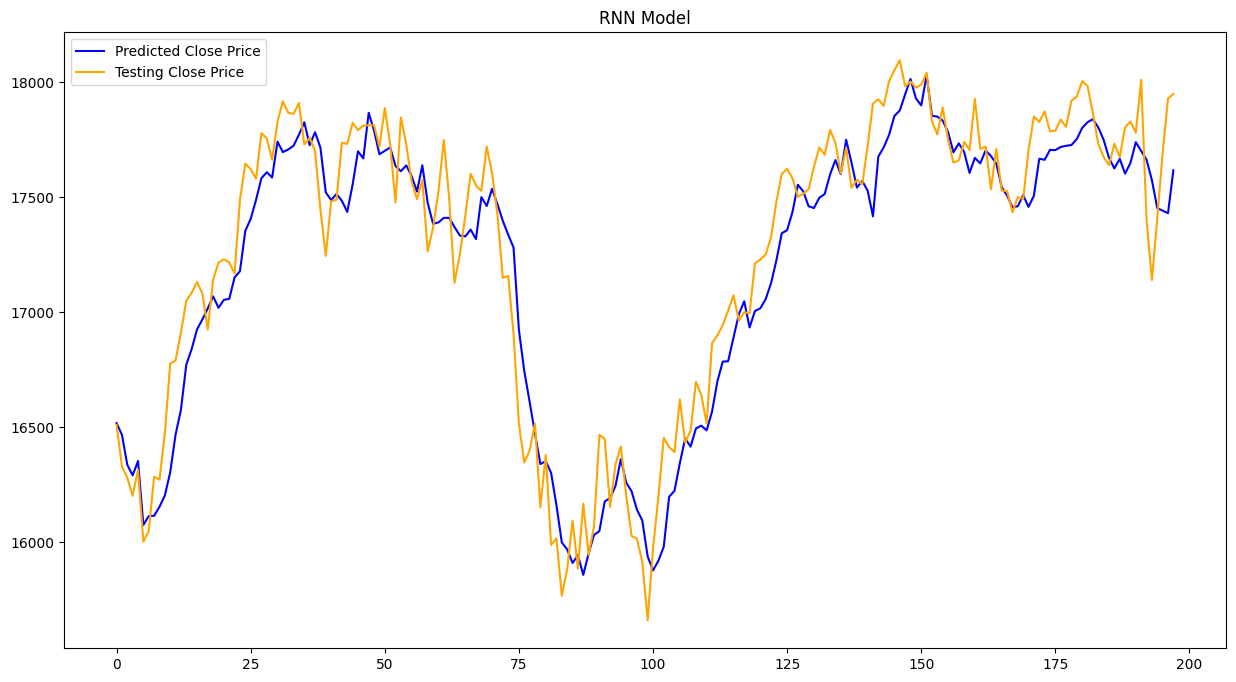

In [ ]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), X.shape[1])))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))
# plotting
plt.figure(figsize=(15,8))
plt.title("LSTM Model")
plt.plot(lstm_predictions, label="Predicted Close Price",color="blue")
plt.plot(y_test, label="Testing Close Price",color="green")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,8))
plt.title("GRU Model")
plt.plot(gru_predictions, label="Predicted Close Price",color="blue")
plt.plot(y_test, label="Testing Close Price",color="red")
plt.legend(loc='best')
plt.show()


plt.figure(figsize=(15,8))
plt.title("RNN Model")
plt.plot(rnn_predictions, label="Predicted Close Price",color="blue")
plt.plot(y_test, label="Testing Close Price",color="orange")
plt.legend(loc='best')
plt.show()

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=ab15b5c8dd3521d06a493936d3df429d32ad929de803572f12a990595f5ae00b
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
from pyswarm import pso

In [ ]:
# Collect predictions from individual models


# Ensemble function to create combined predictions using equal weights initially
def ensemble_function(weights, predictions):
    combined_predictions = np.average(predictions, axis=0, weights=weights)
    return combined_predictions

# Combine predictions into an ensemble
individual_predictions = [lstm_predictions, gru_predictions, rnn_predictions]
initial_weights = np.array([1/3, 1/3, 1/3])  # Initial equal weights

ensemble_predictions = ensemble_function(initial_weights, individual_predictions)
print(ensemble_predictions)

[[16519.52148438]
 [16476.734375  ]
 [16381.72200521]
 [16293.36360677]
 [16328.07714844]
 [16159.19270833]
 [16118.08496094]
 [16136.26920573]
 [16152.08919271]
 [16194.38085938]
 [16327.35807292]
 [16467.22395833]
 [16592.42773438]
 [16765.46484375]
 [16849.86979167]
 [16928.62239583]
 [16980.41536458]
 [17008.87630208]
 [17052.96744792]
 [17029.78710938]
 [17059.50911458]
 [17078.66341146]
 [17138.67773438]
 [17195.28841146]
 [17352.92513021]
 [17403.70182292]
 [17472.64388021]
 [17594.72786458]
 [17622.20703125]
 [17612.078125  ]
 [17725.59635417]
 [17729.35611979]
 [17742.77669271]
 [17757.85807292]
 [17799.0234375 ]
 [17866.93229167]
 [17756.80989583]
 [17781.71289062]
 [17703.81640625]
 [17517.51106771]
 [17483.41471354]
 [17488.21809896]
 [17477.046875  ]
 [17459.21484375]
 [17584.00065104]
 [17684.02604167]
 [17697.08463542]
 [17832.28841146]
 [17768.03776042]
 [17713.65885417]
 [17727.73567708]
 [17720.95377604]
 [17659.83723958]
 [17653.31575521]
 [17666.94661458]
 [17615.53

In [ ]:
from pyswarm import pso  # Import PSO library (if using pyswarm)

# Objective Function for PSO
def objective_function(weights, X_test, y_test, individual_predictions):
    combined_predictions = np.average(individual_predictions, axis=0, weights=weights)
    error = np.mean(np.square(combined_predictions - y_test))
    return error  # Or any other error metric to minimize

# PSO Parameters
bounds = [(-1, 1)] * 3  # Bounds for 3 weights (change according to your requirement)
max_particles = 100
max_iterations = 100

# PSO Optimization
best_weights, _ = pso(objective_function, [-1, -1, -1], [1, 1, 1], args=(X_test, y_test, individual_predictions),
                      swarmsize=max_particles, maxiter=max_iterations)

# Use these optimized weights to generate final predictions
final_predictions = np.average(individual_predictions, axis=0, weights=best_weights)

Stopping search: Swarm best objective change less than 1e-08


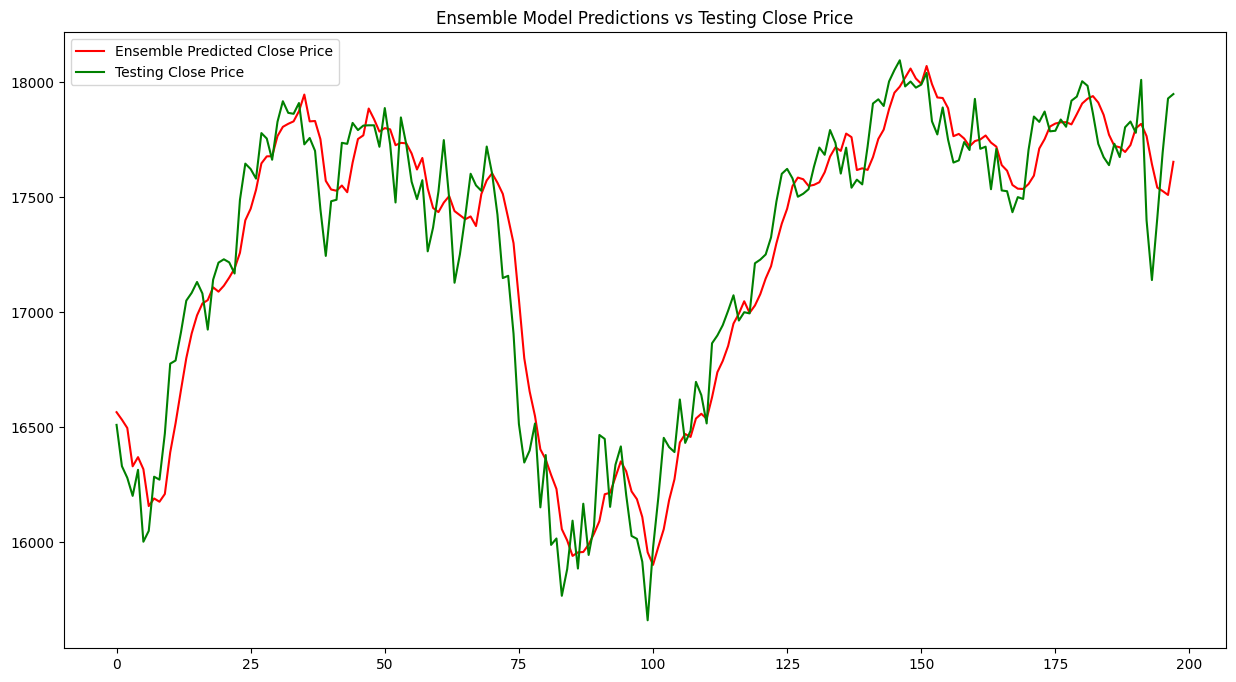

In [ ]:
# Plotting the Ensemble Model's Predictions
plt.figure(figsize=(15, 8))
plt.plot(final_predictions, label="Ensemble Predicted Close Price", color="red")
plt.plot(y_test, label="Testing Close Price", color="green")
plt.legend(loc='best')
plt.title("Ensemble Model Predictions vs Testing Close Price")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, mae

# Calculate regression metrics for LSTM model
lstm_mse, lstm_mae = calculate_regression_metrics(y_test, lstm_predictions)

# Calculate regression metrics for GRU model
gru_mse, gru_mae = calculate_regression_metrics(y_test, gru_predictions)

# Calculate regression metrics for RNN model
rnn_mse, rnn_mae = calculate_regression_metrics(y_test, rnn_predictions)

# Calculate regression metrics for EnsembleRNN model
ensemble_mse, ensemble_mae = calculate_regression_metrics(y_test, final_predictions)

# Print the regression metrics for each model
print("LSTM Model:")
print("Mean Squared Error:", lstm_mse)
print("Mean Absolute Error:", lstm_mae)
print()

print("GRU Model:")
print("Mean Squared Error:", gru_mse)
print("Mean Absolute Error:", gru_mae)
print()

print("RNN Model:")
print("Mean Squared Error:", rnn_mse)
print("Mean Absolute Error:", rnn_mae)
print()

print("EnsembleRNN Model:")
print("Mean Squared Error:", ensemble_mse)
print("Mean Absolute Error:", ensemble_mae)

#!pip install models==0.9.1
models = ['LSTM', 'GRU', 'RNN', 'EnsembleModel']
mae_values = [lstm_mae, gru_mae, rnn_mae, ensemble_mae]

best_model_index_mae = np.argmin(mae_values)
best_model_mae = models[best_model_index_mae]
best_mae = mae_values[best_model_index_mae]

print(f"The best model among LSTM, GRU, RNN,  Ensemble by MAE is {best_model_mae} with an MAE of {best_mae}.")


LSTM Model:
Mean Squared Error: 38179.38666312351
Mean Absolute Error: 161.22569936774002

GRU Model:
Mean Squared Error: 29305.076605815055
Mean Absolute Error: 135.11925404892685

RNN Model:
Mean Squared Error: 35308.413662218714
Mean Absolute Error: 150.7413292935607

EnsembleRNN Model:
Mean Squared Error: 29087.509284771397
Mean Absolute Error: 134.87572993980797
The best model among LSTM, GRU, RNN,  Ensemble by MAE is EnsembleModel with an MAE of 134.87572993980797.


In [ ]:
# Create a Ridge Regression model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


alpha = 1.0  # You can experiment with different alpha values
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# You can also analyze the coefficients to understand feature importance
coefficients = ridge_model.named_steps['ridge'].coef_
print('Feature Coefficients:')
for feature, coef in zip(features + sentiment_features, coefficients):
    print(f'{feature}: {coef}')


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.layers import Bidirectional, LSTM, Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, len(cols))).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, len(cols))).reshape(X_test.shape)

# Create a Bidirectional LSTM model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, len(cols))).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, len(cols))).reshape(X_test.shape)

# Create a Bidirectional LSTM model
bi_model = Sequential()
bi_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bi_model.add(Bidirectional(LSTM(units=50)))
bi_model.add(Dropout(0.2))
bi_model.add(Dense(units=1))

# Compile the model
bi_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bi_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
#mse = model.evaluate(X_test, y_test)
#print(f'Mean Squared Error: {mse}')

# Make predictions on the test set
y_pred = bi_model.predict(X_test)

# You can further analyze the predictions and compare them with the actual values


'''model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# You can further analyze the predictions and compare them with the actual values'''


Epoch 1/10
45/45 [==============================] - 17s 95ms/step - loss: 148629648.0000 - val_loss: 301391936.0000
Epoch 2/10
45/45 [==============================] - 1s 15ms/step - loss: 148258496.0000 - val_loss: 300654208.0000
Epoch 3/10
45/45 [==============================] - 1s 19ms/step - loss: 148006224.0000 - val_loss: 300422112.0000
Epoch 4/10
45/45 [==============================] - 1s 18ms/step - loss: 147861680.0000 - val_loss: 300224896.0000
Epoch 5/10
45/45 [==============================] - 1s 13ms/step - loss: 147731280.0000 - val_loss: 300040544.0000
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 147608896.0000 - val_loss: 299863744.0000
Epoch 7/10
45/45 [==============================] - 1s 15ms/step - loss: 147488400.0000 - val_loss: 299690912.0000
Epoch 8/10
45/45 [==============================] - 1s 12ms/step - loss: 147369840.0000 - val_loss: 299521824.0000
Epoch 9/10
45/45 [==============================] - 1s 15ms/step - loss: 147256

"model = Sequential()\nmodel.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))\nmodel.add(Bidirectional(LSTM(units=50)))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=1))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n\n# Train the model\nmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)\n\n# Evaluate the model\nmse = model.evaluate(X_test, y_test)\nprint(f'Mean Squared Error: {mse}')\n\n# Make predictions on the test set\ny_pred = model.predict(X_test)\n\n# You can further analyze the predictions and compare them with the actual values"

In [ ]:
# predictions on test data
bi_predictions = bi_model.predict(X_test)


# unscaling the predictions
bi_predictions = scaler_y.inverse_transform(np.array(lstm_predictions).reshape((len(lstm_predictions), 1)))


# displaying the predicted values
print('Predictions:')
print(bi_predictions[-10:-1])

7/7 [==============================] - 0s 5ms/step
Predictions:
[[1.03552552e+08]
 [1.03651584e+08]
 [1.03967928e+08]
 [1.04186296e+08]
 [1.03951920e+08]
 [1.03301424e+08]
 [1.02668456e+08]
 [1.02607936e+08]
 [1.02496192e+08]]


In [ ]:
!pip install models==0.9.1
mae_values = [lstm_mae, gru_mae, rnn_mae, ensemble_mae]

best_model_index_mae = np.argmin(mae_values)
best_model_mae = models[best_model_index_mae]
best_mae = mae_values[best_model_index_mae]

print(f"The best model among LSTM, GRU, RNN,  Ensemble by MAE is {best_model_mae} with an MAE of {best_mae}.")

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to calculate confusion matrix and metrics
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return cm, accuracy, precision, recall, f1



# Calculate metrics for LSTM model
lstm_cm, lstm_accuracy, lstm_precision, lstm_recall, lstm_f1 = calculate_metrics(y_test, lstm_predictions)

# Calculate metrics for GRU model
gru_cm, gru_accuracy, gru_precision, gru_recall, gru_f1 = calculate_metrics(y_test, gru_predictions)

# Calculate metrics for RNN model
rnn_cm, rnn_accuracy, rnn_precision, rnn_recall, rnn_f1 = calculate_metrics(y_test, rnn_predictions)

# Print the confusion matrix and metrics for each model
print("LSTM Model:")
print("Confusion Matrix:")
print(lstm_cm)
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1 Score:", lstm_f1)
print()

print("GRU Model:")
print("Confusion Matrix:")
print(gru_cm)
print("Accuracy:", gru_accuracy)
print("Precision:", gru_precision)
print("Recall:", gru_recall)
print("F1 Score:", gru_f1)
print()

print("RNN Model:")
print("Confusion Matrix:")
print(rnn_cm)
print("Accuracy:", rnn_accuracy)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1 Score:", rnn_f1)


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate and print evaluation metrics
def calculate_metrics(y_true, y_pred, model_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print the metrics
    print(f"{model_name} Model:")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

# Convert predictions to binary labels (0 or 1)
lstm_labels = np.where(lstm_predictions > threshold, 1, 0)
gru_labels = np.where(gru_predictions > threshold, 1, 0)
rnn_labels = np.where(rnn_predictions > threshold, 1, 0)
ensemble_labels = np.where(final_predictions > threshold, 1, 0)

# Convert y_test to binary labels (assuming binary classification)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Calculate evaluation metrics for each model
calculate_metrics(y_test_binary, lstm_labels, "LSTM")
calculate_metrics(y_test_binary, gru_labels, "GRU")
calculate_metrics(y_test_binary, rnn_labels, "RNN")
calculate_metrics(y_test_binary, ensemble_labels, "Ensemble")


LSTM Model:
Confusion Matrix:
[[198]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

GRU Model:
Confusion Matrix:
[[198]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

RNN Model:
Confusion Matrix:
[[198]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Ensemble Model:
Confusion Matrix:
[[198]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)

    # Calculate precision, recall, and F1 score
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    return cm, accuracy, precision, recall, f1_score

# Convert predictions to binary labels (0 or 1)
threshold = 0.5
lstm_labels = np.where(lstm_predictions > threshold, 1, 0)
gru_labels = np.where(gru_predictions > threshold, 1, 0)
rnn_labels = np.where(rnn_predictions > threshold, 1, 0)
ensemble_labels = np.where(final_predictions > threshold, 1, 0)

# Calculate evaluation metrics for each model
lstm_cm, lstm_accuracy, lstm_precision, lstm_recall, lstm_f1_score = calculate_metrics(y_test, lstm_labels)
gru_cm, gru_accuracy, gru_precision, gru_recall, gru_f1_score = calculate_metrics(y_test, gru_labels)
rnn_cm, rnn_accuracy, rnn_precision, rnn_recall, rnn_f1_score = calculate_metrics(y_test, rnn_labels)
ensemble_cm, ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1_score = calculate_metrics(y_test, ensemble_labels)

# Print the evaluation metrics for each model
print("LSTM Model:")
print("Confusion Matrix:")
print(lstm_cm)
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1 Score:", lstm_f1_score)
print()

print("GRU Model:")
print("Confusion Matrix:")
print(gru_cm)
print("Accuracy:", gru_accuracy)
print("Precision:", gru_precision)
print("Recall:", gru_recall)
print("F1 Score:", gru_f1_score)
print()

print("RNN Model:")
print("Confusion Matrix:")
print(rnn_cm)
print("Accuracy:", rnn_accuracy)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1 Score:", rnn_f1_score)
print()

print("Ensemble Model:")
print("Confusion Matrix:")
print(ensemble_cm)
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1_score)


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate evaluation metrics
    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    return cm, accuracy, precision, recall, f1_score

# Convert predictions to binary classes (0 or 1)
threshold = 0.5
lstm_binary_predictions = np.where(lstm_predictions > threshold, 1, 0)
gru_binary_predictions = np.where(gru_predictions > threshold, 1, 0)
rnn_binary_predictions = np.where(rnn_predictions > threshold, 1, 0)
ensemble_binary_predictions = np.where(final_predictions > threshold, 1, 0)

# Calculate evaluation metrics for each model
lstm_cm, lstm_accuracy, lstm_precision, lstm_recall, lstm_f1_score = calculate_metrics(y_test, lstm_binary_predictions)
gru_cm, gru_accuracy, gru_precision, gru_recall, gru_f1_score = calculate_metrics(y_test, gru_binary_predictions)
rnn_cm, rnn_accuracy, rnn_precision, rnn_recall, rnn_f1_score = calculate_metrics(y_test, rnn_binary_predictions)
ensemble_cm, ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1_score = calculate_metrics(y_test, ensemble_binary_predictions)

# Print the evaluation metrics for each model
print("LSTM Model:")
print("Confusion Matrix:")
print(lstm_cm)
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1 Score:", lstm_f1_score)
print()

print("GRU Model:")
print("Confusion Matrix:")
print(gru_cm)
print("Accuracy:", gru_accuracy)
print("Precision:", gru_precision)
print("Recall:", gru_recall)
print("F1 Score:", gru_f1_score)
print()

print("RNN Model:")
print("Confusion Matrix:")
print(rnn_cm)
print("Accuracy:", rnn_accuracy)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1 Score:", rnn_f1_score)
print()

print("Ensemble Model:")
print("Confusion Matrix:")
print(ensemble_cm)
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1_score)


ValueError: ignored